In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D 

In [4]:
# 데이터베이스 로드
data = pd.read_csv('/Users/seojuncheol/Desktop/논문/whiskey/data/whiskey_info.csv')

In [5]:
data.info

<bound method DataFrame.info of                                      Name  Rating  Rating count  \
0                   Buffalo Trace Bourbon    3.70         12552   
1                       Lagavulin 16 Year    4.39         11600   
2        Blanton's Original Single Barrel    4.29         11842   
3              Eagle Rare 10 Year Bourbon    4.05         11501   
4                       Laphroaig 10 Year    3.97          9568   
...                                   ...     ...           ...   
17375  Glen Turner 12 Year Master Reserve    3.00             1   
17376      Glenrothes 1989 (Bottled 2002)    3.50             1   
17377    Shelter Point Ripple Rock Whisky    3.75             1   
17378            Potter's Special Old Rye    2.00             1   
17379                  Oppidan Cane + Rye    2.00             1   

         kind_of_whisky   Country     Region  Cost level       Flavor Proflie  \
0               Bourbon       USA   Kentucky           2                Sweet   
1

In [6]:
filtered_data = data[(data.iloc[:, 13:28] != 0).any(axis=1)]
print(len(filtered_data))

3492


In [9]:
# Smoky, Peaty, Spicy, Herbal, Oily, Full_bodied, Rich, Sweet, Briny, Salty, Vanilla, Tart, Fruity, Floral 컬럼 선택
selected_columns = filtered_data[['Smoky', 'Peaty', 'Spicy', 'Herbal', 'Oily', 'Full_bodied', 'Rich', 'Sweet', 'Briny', 'Salty', 'Vanilla', 'Tart', 'Fruity', 'Floral']]

# 데이터 표준화
scaler = StandardScaler()
selected_columns_scaled = scaler.fit_transform(selected_columns)

# PCA 모델 생성
pca = PCA(n_components=4)
flavor_data_pca = pca.fit_transform(selected_columns_scaled)

# 설명력이 높은 변수들의 순서
explained_variance_order = [selected_columns.columns[i] for i in reversed(pca.components_[0].argsort())]

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)
print("Total Explained Variance:", sum(explained_variance_ratio))

# 축소된 데이터를 새로운 DataFrame에 저장
flavor_data_reduced = pd.DataFrame(flavor_data_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

print("Explained Variance Order of Variables:")
for i, variable in enumerate(explained_variance_order):
    print(f"{i+1} : {variable}")

Explained Variance Ratio: [0.26721492 0.17969652 0.12561014 0.0880983 ]
Total Explained Variance: 0.6606198789682974
Explained Variance Order of Variables:
1 : Salty
2 : Oily
3 : Vanilla
4 : Floral
5 : Briny
6 : Fruity
7 : Rich
8 : Full_bodied
9 : Herbal
10 : Smoky
11 : Spicy
12 : Tart
13 : Peaty
14 : Sweet


## PC1, PC2가 전체 분산의 약 80퍼센트를 설명함

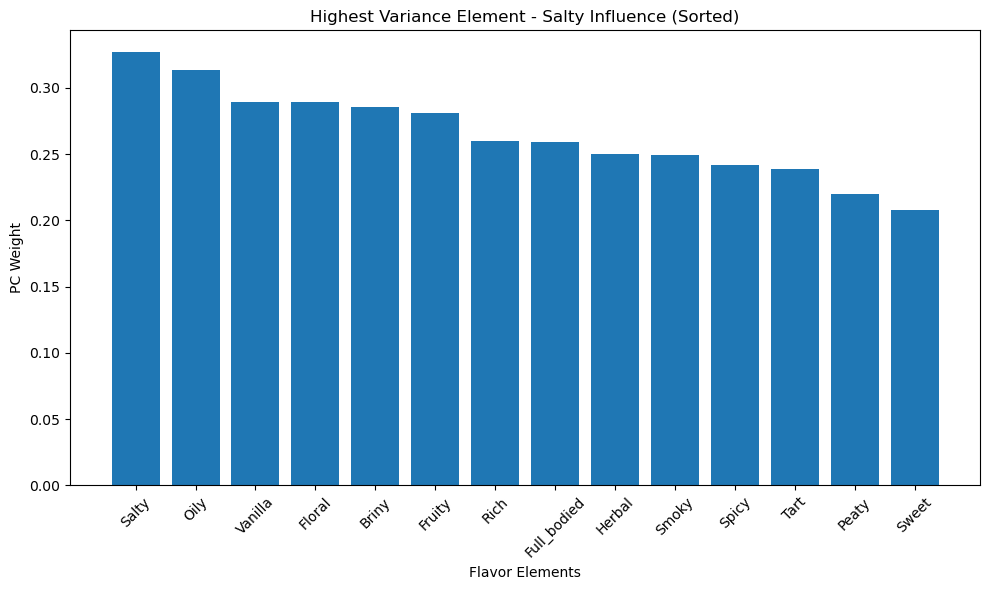

In [12]:
# 설명력이 높은 변수의 가중치 및 변수명
high_variance_var = explained_variance_order[0]
high_variance_weights = pca.components_[0]
high_variance_weights_abs = np.abs(high_variance_weights)  # 절대값으로 변환
sorted_indices = np.argsort(high_variance_weights_abs)[::-1]  # 가중치 절대값의 내림차순으로 정렬한 인덱스

sorted_var_names = [selected_columns.columns[i] for i in sorted_indices]
sorted_weights = [high_variance_weights[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_var_names, sorted_weights)
plt.title(f"Highest Variance Element - {high_variance_var} Influence (Sorted)")
plt.xlabel("Flavor Elements")
plt.ylabel("PC Weight")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
flavor_data_reduced

,PC1,PC2,PC3,PC4
0,-1.444850,-0.224367,-0.523430,-0.549612
1,4.791988,4.998499,1.917406,0.954038
2,1.957546,0.881554,-0.810057,1.629518
3,-1.535687,-1.443322,2.064874,-0.803451
4,3.660322,3.216995,0.324939,-0.641739
...,...,...,...,...
3487,0.044191,0.531826,-2.643204,3.242131
3488,1.131888,-1.416599,0.096595,2.448902
3489,1.338922,-1.198347,-0.541252,1.435933
3490,-2.366649,0.349190,-1.198733,-0.530924


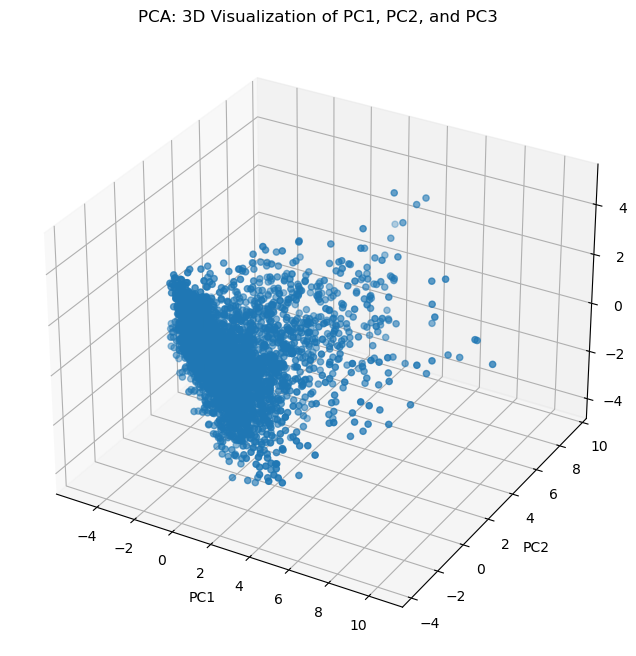

In [15]:
# 3차원으로 주성분 값 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(flavor_data_reduced['PC1'], flavor_data_reduced['PC2'], flavor_data_reduced['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA: 3D Visualization of PC1, PC2, and PC3')
plt.show()

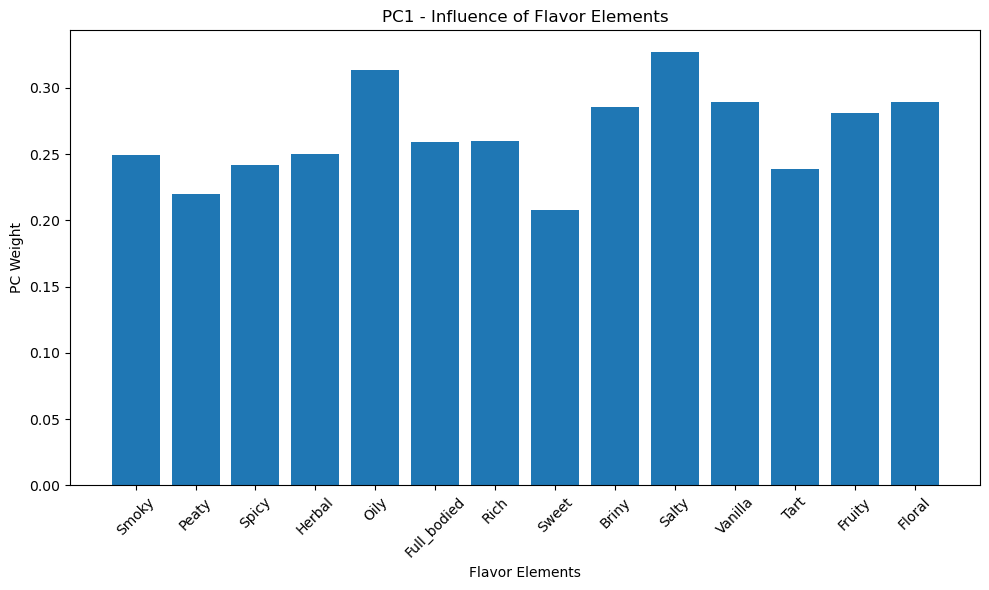

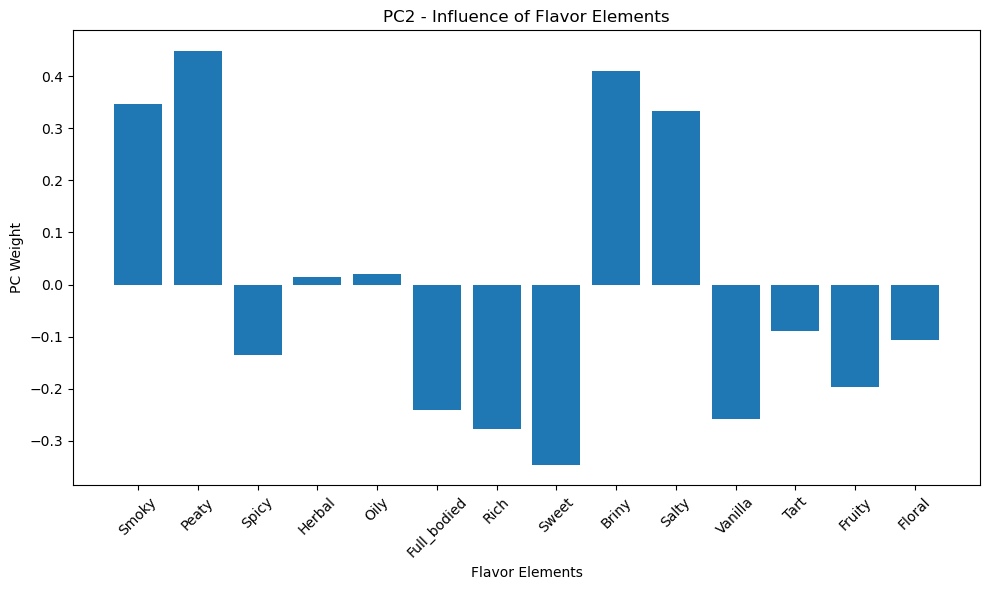

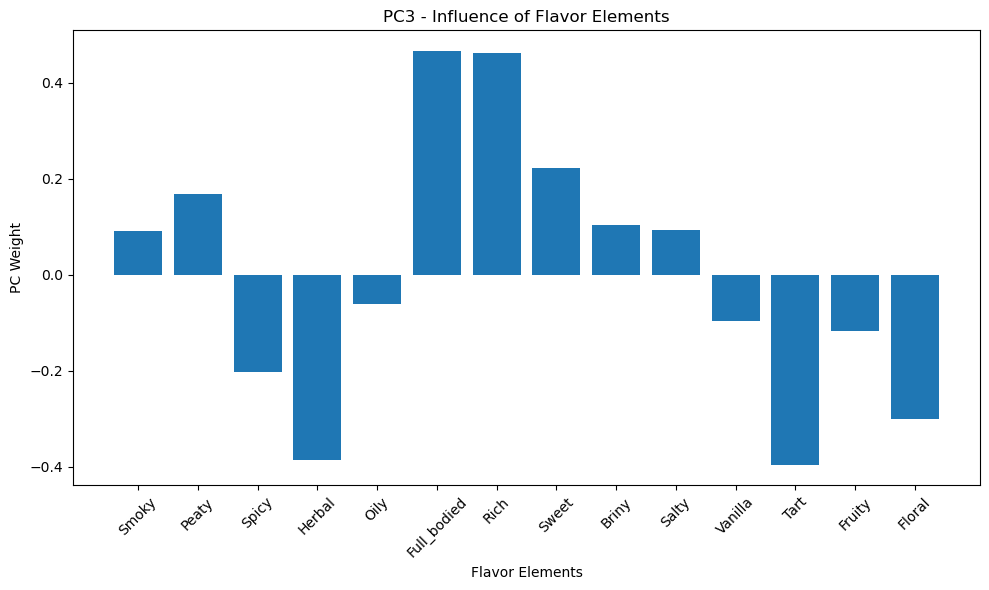

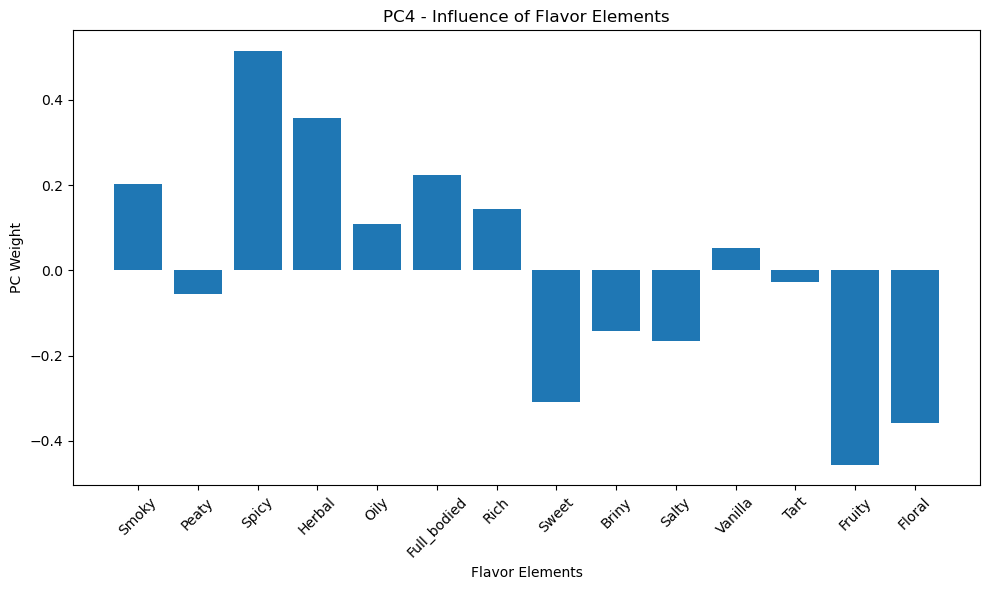

In [16]:
for pc_number in range(4):
    pc_weights = pca.components_[pc_number]  # 해당 주성분의 가중치
    plt.figure(figsize=(10, 6))
    plt.bar(selected_columns.columns, pc_weights)
    plt.title(f"PC{pc_number + 1} - Influence of Flavor Elements")
    plt.xlabel("Flavor Elements")
    plt.ylabel("PC Weight")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()